Assignment 3: Fourier Analysis

In [61]:
import numpy as np
from scipy.io import wavfile
from scipy import signal
import matplotlib
import matplotlib.pyplot as plt
import math

Question 1: Generating sinusoids

1. Write a function (t,x) = generateSinusoidal(amplitude, sampling_rate_Hz, frequency_Hz, length_secs, phase_radians) generating a sinusoidal according to the parameters. The outputs x and t are the generated signal and the corresponding time in seconds. Both outputs must be NumPy arrays of the same length.

In [2]:
def generateSinusoidal(amplitude, sampling_rate_Hz, frequency_Hz, 
                       length_secs, phase_radians):
    t = np.linspace(0,length_secs,math.ceil(sampling_rate_Hz*length_secs))
    x = amplitude * np.sin(2*np.pi*frequency_Hz*t + phase_radians)
    return t, x

2. Add a function call to your script to generate a sine wave with the following parameters: amplitude = 1.0, sampling_rate_Hz = 44100, frequency_Hz = 400 Hz, length_secs = 0.5 seconds, phase_radians = pi/2 radians.

In [3]:
t1, x1 = generateSinusoidal(amplitude = 1.0, sampling_rate_Hz = 44100, 
                   frequency_Hz = 400, length_secs = 0.5, phase_radians = np.pi/2)

3. Plot the first 5 ms of the sinusoid generated in Part 2. above (label the axes correctly, time axis must be in seconds)

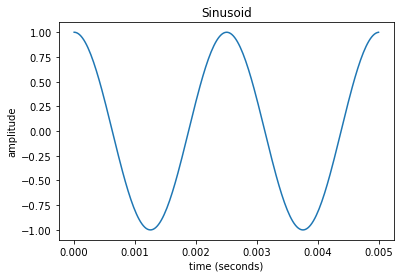

In [18]:
t1subset = t1[t1 <= .005]
x1subset = x1[0: len(t1subset)]

#plt.plot(t,x)
plt.plot(t1subset,x1subset)
plt.xlabel('time (seconds)')
plt.ylabel('amplitude')
plt.title('Sinusoid')
plt.savefig('results/1-3_sinusoid.png')

Question 2. Combining Sinusoids to generate waveforms with complex spectra 

1. Write a function (t,x) = generateSquare(amplitude, sampling_rate_Hz, frequency_Hz, length_secs, phase_radians) that generates a square wave approximated with 10 sinusoidal (https://en.wikipedia.org/wiki/Square_wave (Links to an external site.)) according to the parameters. The outputs x and t are the generated signal and the corresponding time in seconds. Both outputs must be NumPy arrays of the same length. Note: use the function generateSinusoidal from Question 1.1 for this part

In [19]:
def generateSquare(amplitude, sampling_rate_Hz, frequency_Hz, length_secs, phase_radians):
    sum_sines = np.zeros(math.ceil(length_secs*sampling_rate_Hz))
    for k in range(1,10):
        t, sin_k = generateSinusoidal(amplitude, sampling_rate_Hz, (2*k-1)*frequency_Hz, length_secs, phase_radians) 
        sum_sines += sin_k / (2*k-1)

    x = 4 / np.pi * sum_sines
    
    return t, x

2. Add function calls to your main function to create a square wave with the following parameters: amplitude = 1.0, sampling_rate_Hz = 44100 Hz, frequency_Hz = 400 Hz, length_secs = 0.5 seconds, phase_radians = 0 radians

In [20]:
t2, x2 = generateSquare(amplitude = 1.0, sampling_rate_Hz = 44100,
                      frequency_Hz = 400, length_secs = 0.5, phase_radians = 0)

3. Plot the first 5 ms of the generated square waves in Part 2.2.

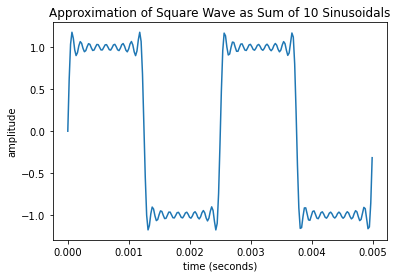

In [21]:
t2subset = t2[t2 <= .005]
x2subset = x2[0: len(t2subset)]

#plt.plot(t,x)
plt.plot(t2subset,x2subset)
plt.xlabel('time (seconds)')
plt.ylabel('amplitude')
plt.title('Approximation of Square Wave as Sum of 10 Sinusoidals')
plt.savefig('results/2-3_square.png')
plt.show()

Question 3. Fourier Transform 

1. Write a function (f,XAbs,XPhase,XRe,XIm) = computeSpectrum(x, sample_rate_Hz) that computes the FFT of the complete input signal vector x and returns the magnitude spectrum XAbs, the phase spectrum XPhase, the real part XRe, and the imaginary part XIm, the frequency of the bins f. All outputs must be NumPy arrays. Return only the non-redundant part (without symmetry). You may use the NumPy fft function in order to compute the FFT


In [22]:
def computeSpectrum(x, sample_rate_Hz):
    #fourier transform
    fourier=np.fft.fft(x)
    XAbs_all=np.abs(fourier)
    XRe_all=np.real(fourier)
    XIm_all=np.imag(fourier)
    XPhase_all=np.angle(fourier)
    
    n=x.size
    #list of frequencies
    f=np.arange(0,sample_rate_Hz/2,sample_rate_Hz/n)
    #keep non-redundant part without symmetry
    XAbs = XAbs_all[0:len(f)]
    XPhase = XPhase_all[0:len(f)]
    XRe = XRe_all[0:len(f)]
    XIm = XIm_all[0:len(f)]
    
    return (f, XAbs, XPhase, XRe, XIm)

2. Add function calls to your main function to compute the spectrum of the sinusoid and square waves generated in Question1.2 and Question 2.2

In [23]:
f1, XAbs1, XPhase1, XRe1, XIm1 = computeSpectrum(x=x1, sample_rate_Hz=44100)

In [24]:
f2, XAbs2, XPhase2, XRe2, XIm2 = computeSpectrum(x=x2, sample_rate_Hz=44100)

3. Plot the magnitude and phase spectra for each signal (2 sub-plots for magnitude and phase in 1 plot), (label the axes correctly, frequency axis must be in Hz) (There will be two plots. One for each signal.)

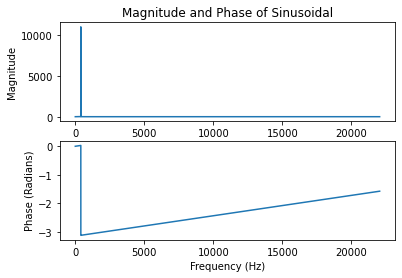

In [29]:
plt.subplot(2,1,1)
plt.plot(f1,XAbs1)
plt.title('Magnitude and Phase of Sinusoidal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.subplot(2,1,2)
plt.plot(f1,XPhase1)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (Radians)')
plt.savefig('results/3-3_sinusoidal.png')
plt.show()

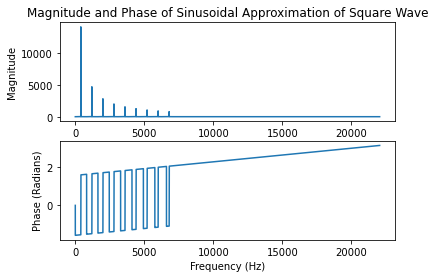

In [31]:
plt.subplot(2,1,1)
plt.plot(f2,XAbs2)
plt.title('Magnitude and Phase of Sinusoidal Approximation of Square Wave')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.subplot(2,1,2)
plt.plot(f2,XPhase2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (Radians)')
plt.savefig('results/3-3_square.png')
plt.show()

4. What is the frequency resolution (difference in frequency between the bins) of the FFT obtained above?

In [195]:
f1[1] - f1[0]

2.0

5. How will the frequency resolution change in this case if you zero-pad the input signal with the same of zeros as the length of the input signal? (Answer 3.4 & 3.5 in a text file in results folder)

The signal will be twice as long while holding the sample rate constant, so the resolution will increase to 1.0 Hz. 

Question 4. Spectrogram (30 points)

1. Write a function (t, X) = generateBlocks(x, sample_rate_Hz, block_size, hop_size) which blocks a given signal x according to the given parameters. The output t is a NumPy array containing the time stamps of the blocks and X is a matrix (block_size x N) where each column is a block of the signal. Note: You may need to zero-pad the input signal appropriately for the last block. Time stamps should be the time-stamp corresponding to the 1st sample of the block.

In [32]:
def generateBlocks(x, sample_rate_Hz, block_size, hop_size):
    #number of blocks
    N=math.ceil(x.size/hop_size-1)
    #initialize X
    X = np.zeros((block_size,N))
    t = np.zeros(N)
    #populate blocks
    for n in range(0,N):
        start=n*hop_size
        stop=start+block_size
        if n<N-1:
            block=x[start : stop]  
        else: #zero pad the last block to make it the correct length
            lastBlock=x[start:]
            zeroPadding=np.zeros(block_size-len(lastBlock))
            block=np.concatenate((lastBlock,zeroPadding),axis=0) 
        X[:,n]=block
        t[n]=start/sample_rate_Hz
    return (t, X)

In [33]:
t, X = generateBlocks(x=x1,sample_rate_Hz=44100,block_size=2048,hop_size=1024)

2. Write a function (freq_vector, time_vector, magnitude_spectrogram) = mySpecgram(x,  block_size, hop_size, sampling_rate_Hz, window_type) that computes the FFT per block windowed using the window type specified. freq_vector and time_vector are both column vectors containing the frequency of the bins in Hz (block_size/2 x 1) and the time stamps of the blocks in seconds (N x 1) respectively where N is the number of blocks. magnitude_spectrogram is a (block_size/2 x N) matrix where each column is the FFT of a signal block.  The parameter window_type is a string which can take the following values: ‘rect’ for a rectangular window and ‘hann’ for a Hann window. The function should also plot the magnitude spectrogram (labeling the axes appropriately Note: You may use the NumPy fft, hanning and Matplotlib specgram methods. You can use the generateBlocks and computeSpectrum methods which you created earlier.

In [65]:
def mySpecgram(x, block_size, hop_size, sampling_rate_Hz, window_type):
    #block the input signal
    time_vector, X = generateBlocks(x,sampling_rate_Hz,block_size,hop_size)
    
    #compute the FFT for each block
    
    #number of blocks
    N = X.shape[1]
    magnitude_spectrogram=np.zeros((math.ceil(block_size/2),N))
    for n in range(0,N):    
        block=X[:,n]
        t=time_vector[n]

        if window_type=='hann':
            w = np.hanning(block_size)
            xw=np.multiply(w,block)
        else: #rectangular window 
            xw=block
        
        freq_vector, XAbs, XPhase, XRe, XIm = computeSpectrum(x=xw, sample_rate_Hz=sampling_rate_Hz)
        magnitude_spectrogram[:,n]=XAbs
    
    #plt.pcolormesh(time_vector, freq_vector, magnitude_spectrogram,shading='auto')
    #plt.colorbar()
    #plt.show()

   
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    if window_type=='rect':
        plt.title('Spectrogram for Sinusoidal Approximation of Square Wave: Rectangular Window')
        plt.specgram(x,window=matplotlib.mlab.window_none,Fs=sampling_rate_Hz)
        plt.savefig('results/4-3_spectrogram_rect.png')
    elif window_type=='hann':
        plt.title('Spectrogram for Sinusoidal Approximation of Square Wave: Hanning Window')
        plt.specgram(x,NFFT=block_size,Fs=sampling_rate_Hz) #default is hanning window
        plt.savefig('results/4-3_hann.png')
    plt.show()
       
    return (freq_vector, time_vector, magnitude_spectrogram)
    

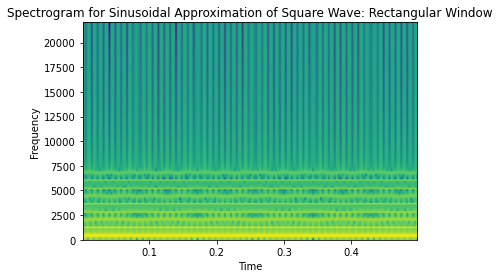

In [67]:
freq_vector, time_vector, magnitude_spectrogram = mySpecgram(x=x2, block_size=2048, hop_size=1024, sampling_rate_Hz=44100, window_type='rect')

Question 5. BONUS: Sine-Sweep 

How would you approach generating a sine sweep in the spectral domain using only a single spectrum (not a spectrogram). Write a script that generates a sine-sweep in the frequency domain using one single spectrum. You may not use the SciPy chirp function.

In [87]:
def sineSweep(startFreq,endFreq,length_secs,sampling_rate_Hz):
    t = np.linspace(0,length_secs,math.ceil(sampling_rate_Hz*length_secs))
    #print(len(t))
    x = np.zeros(len(t))
    for i in range(0,len(t)-1):
        #linear interpolation between starting and ending frequency
        freq=startFreq+(endFreq-startFreq)*i/len(t)
        x[i] = np.sin(2*np.pi*freq*t[i])
    return t, x
tsweep, xsweep = sineSweep(100,1000,1,44100)

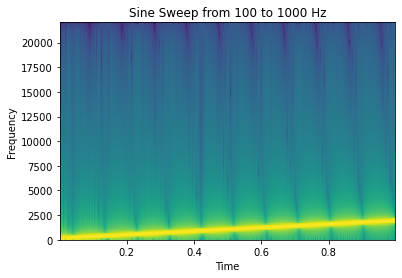

In [92]:
plt.title('Sine Sweep from 100 to 1000 Hz')
plt.specgram(xsweep,Fs=44100) 
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.savefig('results/Bonus.png')
plt.show()

In [117]:
#write as audio file to test
from scipy.io.wavfile import write
write('audio/sinesweep.wav',44100,xsweep.astype(np.float32))